In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix as conf, f1_score as f1, accuracy_score as acc

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


In [ ]:
# Needed and Previously Done Adjustments

df.replace(to_replace = 0, value = df.mean(), inplace = True)

age_bins = [21, 29, 39, 49, 59, 65, float('inf')]
age_labels = ["Young Adult", "Adult", "Middle-Aged", "Older Middle-Aged", "Senior", "Elderly"]

preg_bins = [0, 1, 2, 4, float('inf')]
preg_labels = ["None", "Small Family", "Medium Family", "Large Family"]

dpf_bins = [0, 0.5, 1.0, float('inf')] # DiabetesPedigreeFunction values Scaled and then Classified according to the Measurements in the Dataset
dpf_labels = ["Low Risk", "Moderate Risk", "High Risk"]

bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, float('inf')] # BMI Classification based on Standard Metrics
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese", "Extremely Obese"]

df["AgeGroup"] = pd.cut(df["Age"], bins = age_bins, labels = age_labels, right = False)
df["ChildrenBirthed"] = pd.cut(df["Pregnancies"], bins = preg_bins, labels = preg_labels, right = False)
df["DiabetesRisk"] = pd.cut(df["DiabetesPedigreeFunction"], bins = dpf_bins, labels = dpf_labels, right = False)
df["BMIClass"] = pd.cut(df["BMI"], bins = bmi_bins, labels = bmi_labels, right = False)

In [ ]:
print(df.shape)
df.head(9)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1


In [ ]:
# Columns where we Cannot afford to have Any 0s

zero_noacc = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_noacc:
  df[column] = df[column].replace(0, np.nan)
  mean = int(df[column].mean(skipna = True))
  df[column] = df[column].replace(np.nan, mean)

In [ ]:
# Splitting the Dataset

X = df.iloc[:, :8] # Features (Excludes the "Outcome", which will be the Target variable)
y = df.iloc[:, 8] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [ ]:
df.iloc[:, 0]

,Pregnancies
0,6
1,1
2,8
3,1
4,0
...,...
763,10
764,2
765,5
766,1


In [ ]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating a Model, using KNN, which will Predict whether a person will have Diabetes or not

In [ ]:
# Defining the KNN Model

classifier = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# Predicting the Test set Results

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Evaluating the Model

cm = conf(y_test, y_pred)
print(cm) # 15 were False Positives, 22 were False Negatives; 82 were True Negatives, 35 were True Positives

[[82 15]
 [22 35]]


In [ ]:
print(round(f1(y_test, y_pred)*100, 2), '%')
print(round(acc(y_test, y_pred)*100, 2), '%')

65.42 %
75.97 %


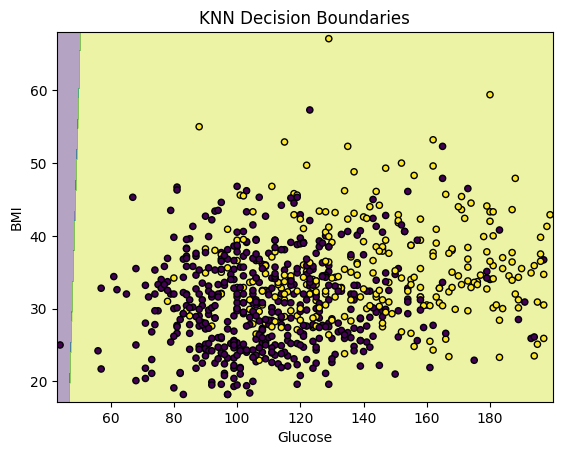

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# We will use only two features for visualization, for example, 'Glucose' and 'BMI'
feature1_index = df.columns.get_loc('Glucose')
feature2_index = df.columns.get_loc('BMI')

# Define the boundaries of the plot
# Access the features using NumPy array indexing on the original DataFrame (df):
x_min, x_max = df.iloc[:, feature1_index].min() - 1, df.iloc[:, feature1_index].max() + 1
y_min, y_max = df.iloc[:, feature2_index].min() - 1, df.iloc[:, feature2_index].max() + 1


# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Reshape the meshgrid to have the same number of features as X
meshgrid_data = np.c_[xx.ravel(), yy.ravel()]
# Add columns of zeros for the remaining features
num_features = X.shape[1]  # Get the number of features in X
num_meshgrid_features = meshgrid_data.shape[1]  # Get the number of features in meshgrid_data
if num_features > num_meshgrid_features:
    padding = np.zeros((meshgrid_data.shape[0], num_features - num_meshgrid_features))
    meshgrid_data = np.concatenate([meshgrid_data, padding], axis=1)

# Predict the class for each point in the meshgrid
Z = classifier.predict(sc.transform(meshgrid_data))  # Use sc.transform on meshgrid_data
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
# Access the features using NumPy array indexing on the original DataFrame (df) for plotting:
plt.scatter(df.iloc[:, feature1_index], df.iloc[:, feature2_index], c=y, s=20, edgecolor='k')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('KNN Decision Boundaries')
plt.show()

## Data Visualization (Optional, in this case, but Still Important)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

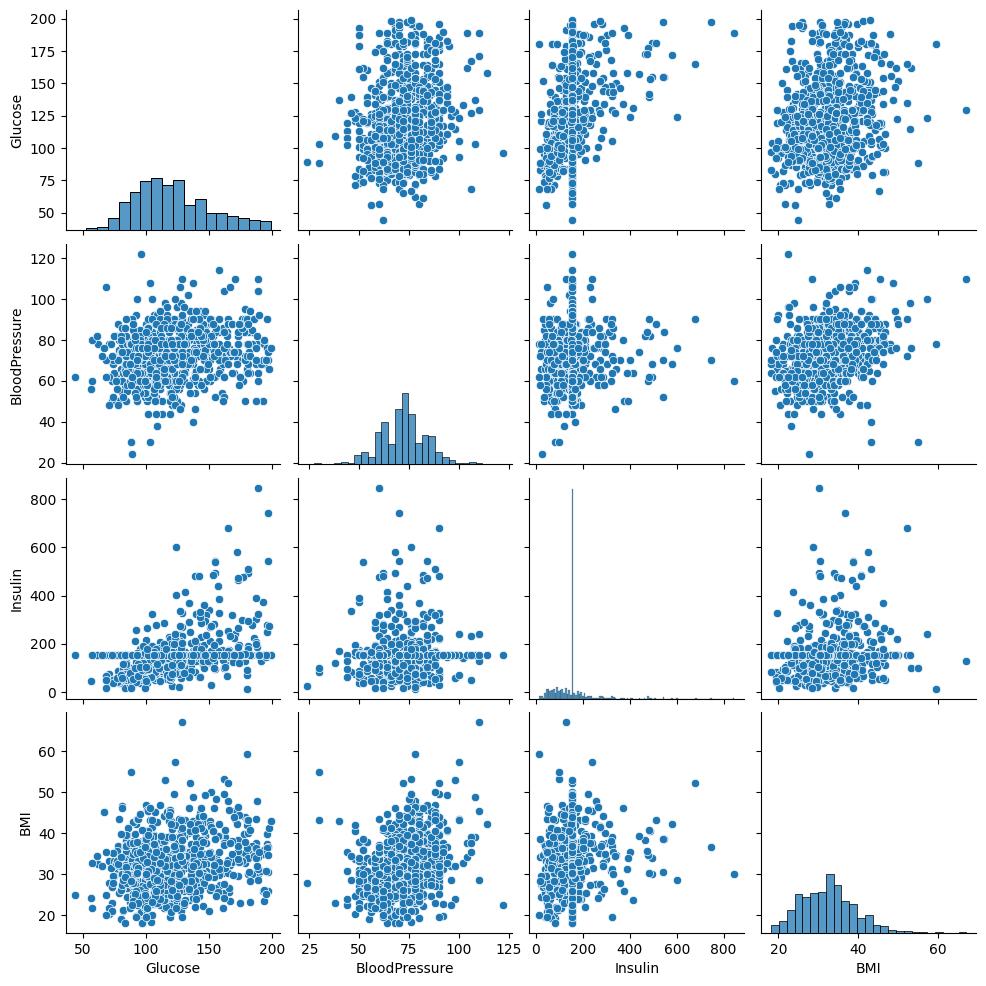

In [ ]:
sns.pairplot(df[['Glucose', 'BloodPressure', 'Insulin', 'BMI']])

plt.show()

"Insulin" seems to have a A LOT of values below the 200 but above the 150 mark. So, I checked its 'value_counts()' and also Normalized them to then create a Pie chart to Illustrate its share of values.

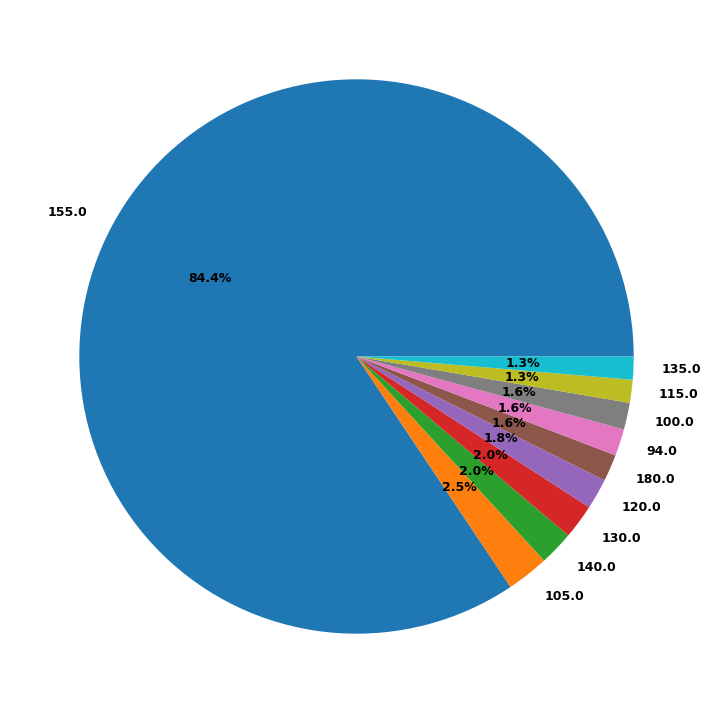

In [ ]:
plt.figure(figsize = (10, 9))

plt.pie(df["Insulin"].value_counts(normalize = True).head(10), labels = df["Insulin"].value_counts().head(10).index,
        autopct = '%1.1f%%', textprops = {'fontsize': 9, 'fontweight': 'bold'})
plt.show() # Yeah, the Bulk Share is of 155.0, as Reflected in the Pairplot too. Fair enough.

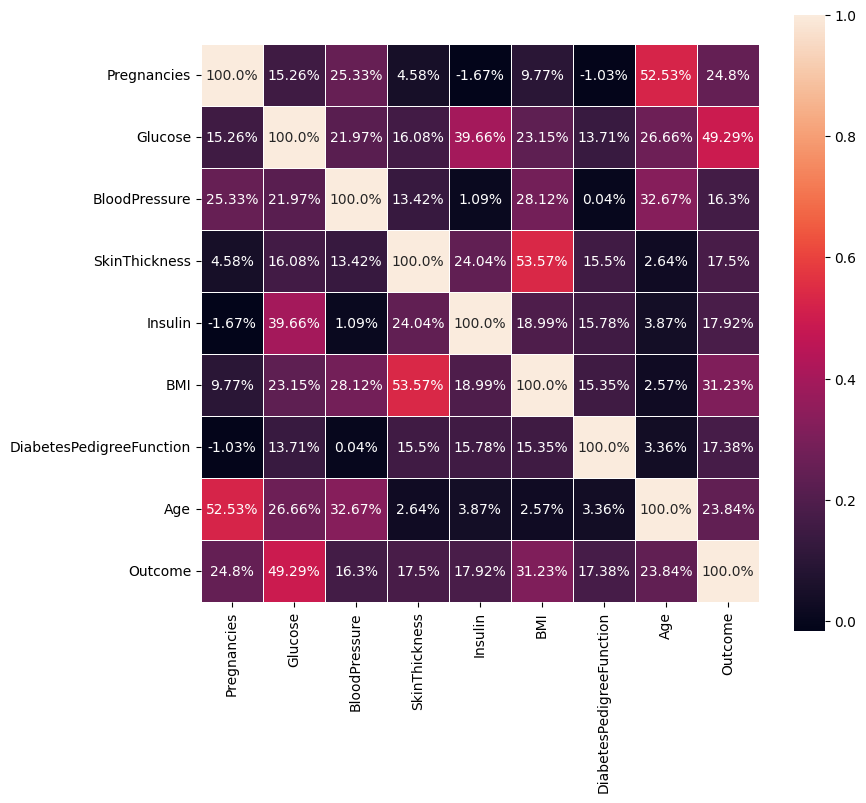

In [ ]:
# One of my Favorite Visuals, which I almost-always Include; my Signature: The Correlation Heatmap!

corrs = (df.corr(numeric_only = True).values*100).round(2).astype(str) + str('%')

plt.figure(figsize = (9, 8))
sns.heatmap(df.corr(numeric_only = True), annot = corrs, fmt = '', square = True, linewidths = 0.5)

plt.savefig("diabetes_variables_heatmap.png")

plt.show()

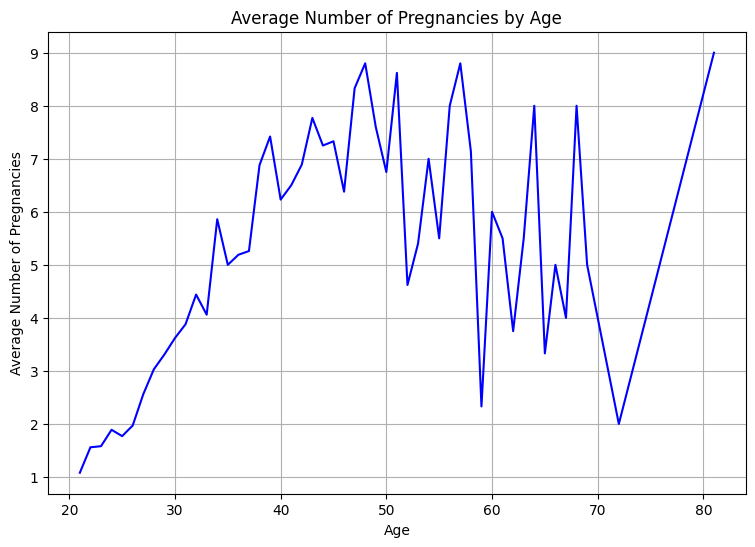

In [ ]:
plt.figure(figsize = (9, 6))

avg_preg_age = df.groupby('Age')['Pregnancies'].mean().round(2)

ax = sns.lineplot(x = avg_preg_age.index, y = avg_preg_age.values, color = 'blue')
ax.set_xlabel('Age')
ax.set_ylabel('Average Number of Pregnancies')
ax.set_title('Average Number of Pregnancies by Age')

plt.grid(True)
plt.show() # Surprising Patterns; and "Age" and "Pregnancies" did have the Highest Amount of Correlation: 54.43%

## **K-Means Clustering**

In [ ]:
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,ChildrenBirthed,DiabetesRisk,BMIClass
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.000000,Older Middle-Aged,Large Family,Moderate Risk,Obese
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.348958,Adult,Small Family,Low Risk,Overweight
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.000000,Adult,Large Family,Moderate Risk,Normal
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.348958,Young Adult,Small Family,Low Risk,Overweight
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.000000,Adult,Medium Family,High Risk,Extremely Obese
5,5.000000,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0.348958,Adult,Large Family,Low Risk,Overweight


I will Cluster the Participants according to BMI and DiabetesPedigreeFunction

In [ ]:
x = df.iloc[:, 5:7].values

In [ ]:
# Creating an Elbow plot to Determine how many Clusters I should have

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++') # "init": Initializes the Centroids, "n_clusters": no. of Clusters in each Iteration; will go from 1 to 10
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

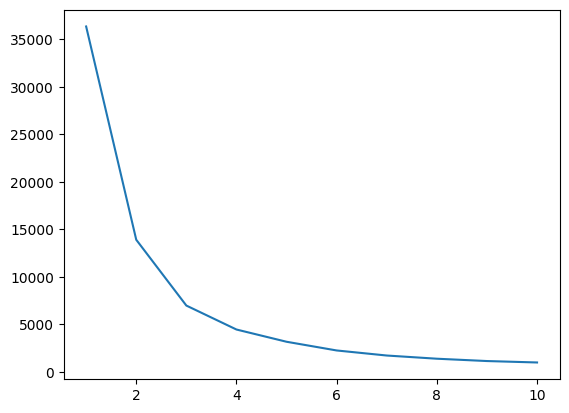

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(range(1, 11), wcss)
plt.show() # Optimal Clusters = seem to be '4'

In [ ]:
k_means = KMeans(n_clusters = 4, init = "k-means++")
y_kmeans = k_means.fit_predict(x)

In [ ]:
# Place in the Cluster no. for each instance

updated_df = pd.concat([df, pd.DataFrame(y_kmeans + 1, columns = ["Cluster No."])], axis = 1)

updated_df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,ChildrenBirthed,DiabetesRisk,BMIClass,Cluster No.
0,6.000000,148.0,72.000000,35.000000,79.799479,33.6,0.627,50,1.000000,Older Middle-Aged,Large Family,Moderate Risk,Obese,3
1,1.000000,85.0,66.000000,29.000000,79.799479,26.6,0.351,31,0.348958,Adult,Small Family,Low Risk,Overweight,2
2,8.000000,183.0,64.000000,20.536458,79.799479,23.3,0.672,32,1.000000,Adult,Large Family,Moderate Risk,Normal,2
3,1.000000,89.0,66.000000,23.000000,94.000000,28.1,0.167,21,0.348958,Young Adult,Small Family,Low Risk,Overweight,2
4,3.845052,137.0,40.000000,35.000000,168.000000,43.1,2.288,33,1.000000,Adult,Medium Family,High Risk,Extremely Obese,4
5,5.000000,116.0,74.000000,20.536458,79.799479,25.6,0.201,30,0.348958,Adult,Large Family,Low Risk,Overweight,2
6,3.000000,78.0,50.000000,32.000000,88.000000,31.0,0.248,26,1.000000,Young Adult,Medium Family,Low Risk,Obese,3
7,10.000000,115.0,69.105469,20.536458,79.799479,35.3,0.134,29,0.348958,Adult,Large Family,Low Risk,Extremely Obese,1


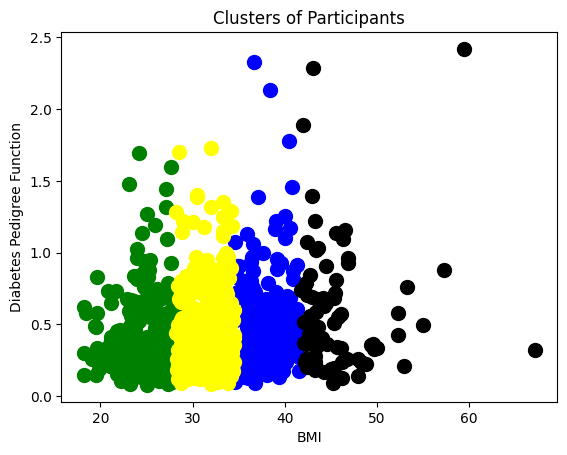

In [ ]:
# Creating a Scatterplot to Display Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = "blue") # Cluster 1
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = "green") # Cluster 2
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = "yellow") # Cluster 3
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = "black") # Cluster 4

plt.xlabel("BMI")
plt.ylabel("Diabetes Pedigree Function")
plt.title("Clusters of Participants")
plt.show()

In [ ]:
updated_df.groupby("Cluster No.")[["BMI", "DiabetesPedigreeFunction"]].mean().round(2)

,BMI,DiabetesPedigreeFunction
Cluster No.,,
1,37.44,0.49
2,24.64,0.42
3,31.57,0.47
4,45.83,0.59
